In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import timeline_drawer
from datetime import datetime
import time
# transpile
from qiskit.transpiler import InstructionDurations, PassManager
from qiskit.transpiler.passes import DynamicalDecoupling, Unroller, ALAPSchedule, LookaheadSwap, BasicSwap
#RB
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
from qiskit_experiments.library.randomized_benchmarking.rb_experiment_dd import StandardRB_dd
from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import RXXGate, RZZGate, RZXGate, XGate, SXGate, IGate, CCXGate, SGate, CXGate
from qiskit_experiments.library.randomized_benchmarking.double_interleaved_rb_experiment import DoubleInterleavedRB


In [4]:
%matplotlib inline

In [5]:

#IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='snu', project='snu-students')>]

In [6]:
provider=IBMQ.providers()[1]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
backend = provider.get_backend('ibm_lagos')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibm_lagos is on version 1.0.28. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 5], [4, 5], [5, 3], [5, 4], [5, 6], [6, 5]] are the list of connected qubits.ibm_lagos can handle maximum 300 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


In [7]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit=np.arange(1,1200,120)
num_samples = 3
seed = 1010
qubits = (4,5)
print(backend)
print(qubits)

single_exps = BatchExperiment(
    [
        StandardRB([qubit], lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ],
    flatten_results=True,
)
expdata_1q = single_exps.run(backend).block_for_results()

ibm_lagos
(4, 5)


Experiment cannot be saved because no experiment service is available. An experiment service is available, for example, when using an IBM Quantum backend.
Experiment cannot be saved because no experiment service is available. An experiment service is available, for example, when using an IBM Quantum backend.
Experiment cannot be saved because no experiment service is available. An experiment service is available, for example, when using an IBM Quantum backend.


Component experiment 0


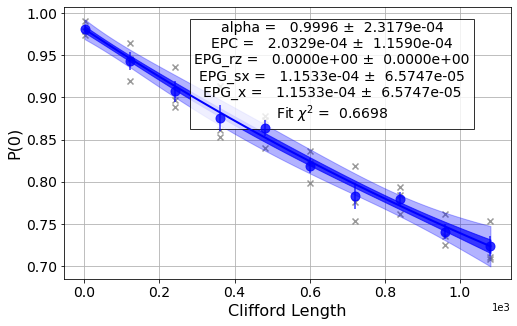

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.7238896910088422, 0.9995934224510826, 0.2571189450347646]
- χ²: 0.6698150807244936
- quality: good
- extra: <4 items>
- device_components: ['Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99959+/-0.00023
- χ²: 0.6698150807244936
- quality: good
- extra: <1 items>
- device_components: ['Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.00020+/-0.00012
- χ²: 0.6698150807244936
- quality: good
- extra: <1 items>
- device_components: ['Q6']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0+/-0
- χ²: 0.6698150807244936
- quality: good
- extra: <1 items>
- device_components: ['Q6']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00012+/-0.00007
- χ²: 0.6698150807244936
- quality: good
- extra: <1 items>
- device_components: ['Q6']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00012+/-0.00007
- χ²: 0.6698150807244936
- quality: good
- extra: <1 items>


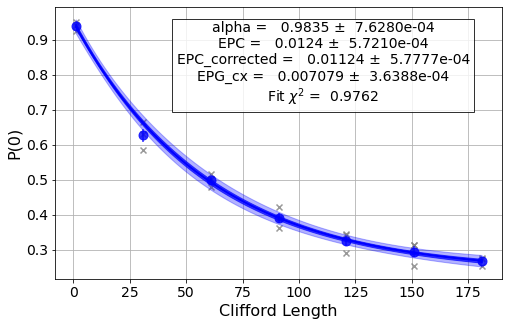

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.7162116382036473, 0.983466630451941, 0.23348521541924985]
- χ²: 0.9762425943575308
- quality: good
- extra: <4 items>
- device_components: ['Q4', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9835+/-0.0008
- χ²: 0.9762425943575308
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0124+/-0.0006
- χ²: 0.9762425943575308
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC_corrected
- value: 0.0112+/-0.0006
- χ²: 0.9762425943575308
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPG_cx
- value: 0.0071+/-0.0004
- χ²: 0.9762425943575308
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5']
- verified: False


In [8]:
lengths_1_qubit=np.arange(1,1200,120)
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)
exp_1q = StandardRB(qubits=[6], lengths=lengths_1_qubit, num_samples=num_samples, seed=seed)
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())
exps=[exp_1q,exp_2q]
par_exp=ParallelExperiment(exps)
par_expdata=par_exp.run(backend).block_for_results()
par_expdata.save()
par_results=par_expdata.analysis_results()
sub_results=[]
sub_results_list=[]
for i in range(par_exp.num_experiments):
    print(f"Component experiment {i}")
    sub_data = par_expdata.component_experiment_data(i)
    display(sub_data.figure(0))
    sub_result=sub_data.analysis_results()
    sub_results += sub_result
    sub_results_list.append(sub_result)
    for result in sub_result:
        print(result)

ibm_lagos
2022-06-28 15:05:04.949517


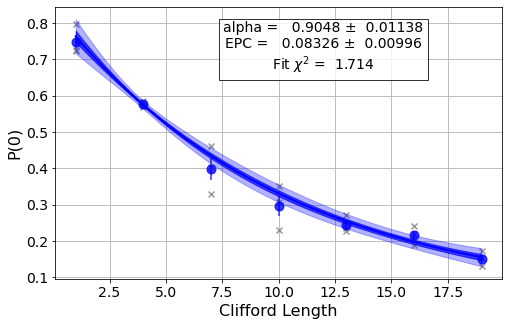

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.8050041659919785, 0.9048465772872053, 0.03517852886337854]
- χ²: 1.7142205865935374
- quality: good
- extra: <4 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.905+/-0.011
- χ²: 1.7142205865935374
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.083+/-0.010
- χ²: 1.7142205865935374
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False


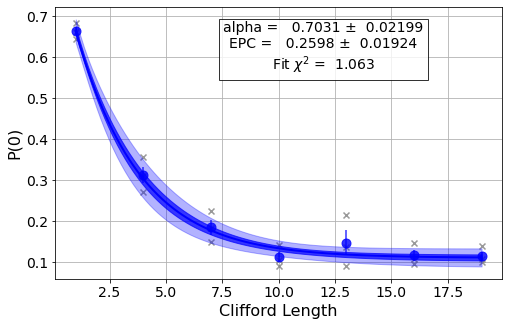

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.7861539732266404, 0.7031185540819139, 0.11049535763301677]
- χ²: 1.0629079953597813
- quality: good
- extra: <4 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.703+/-0.022
- χ²: 1.0629079953597813
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.260+/-0.019
- χ²: 1.0629079953597813
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False


In [9]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [4,5,6]
print(backend)
print(datetime.today())

exp1 = StandardRB_dd(qubits, lengths, backend, num_samples=num_samples, seed=seed, dd_sequence=[XGate(), XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)
exp2 = StandardRB(qubits, lengths, backend, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()
display(expdata2.figure(0))
for result in results2:
    print(result)

In [28]:
def expected_alpha_3Q_num(N1,N2,alpha1,alpha2) :
    return alpha1**(N1/3)*alpha2**(2*N2/3)*(1+3*alpha1**(N1/3)*alpha2**(N2/3)+3*alpha1**(2*N1/3)*alpha2**(N2/3))/7   
def number_of_gates(circuit):
    operation_count=circuit.count_ops()
    num_single_gate=0
    num_double_gate=0
    if('sx' in operation_count):
        num_single_gate+=operation_count['sx']
    if('x' in operation_count):
        num_single_gate+=operation_count['x']
    if('rz' in operation_count):
        num_single_gate+=operation_count['rz']
    if('cx' in operation_count):
        num_double_gate+=operation_count['cx']
    if('i' in operation_count):
        num_single_gate+=operation_count['i']
    return num_single_gate,num_double_gate

def expected_alpha_3Q(exp,backend,alpha1,alpha2):
    N1=0
    N2=0
    Clifford_num=0
    transfiled_circuits=exp._transpiled_circuits()
    circuits=exp.circuits()
    for i in circuits:
        clifford_num=(len(i.count_ops())-2)
        Clifford_num+=clifford_num
    for i in transfiled_circuits:    
       
        n1,n2=number_of_gates(i)
        N1+=n1
        N2+=n2
        #print(i.count_ops())
        #print("Average "+str(n1/(clifford_num))+" single gates & "+str(n2/(clifford_num))+" cx gates")
        
    N1=N1/Clifford_num
    N2=N2/Clifford_num
    print("n1 :"+str(N1)+" n2 : "+str(N2))
    return expected_alpha_3Q_num(N1,N2,alpha1,alpha2)

In [29]:
alpha_1q= par_expdata.component_experiment_data(0).analysis_results()[1].value
epc_corrected = par_expdata.component_experiment_data(1).analysis_results()[3].value
alpha_2q= (1-3*epc_corrected/4)
alpha_1q,alpha_2q

(0.9995934224510826+/-0.00023179100439922856,
 0.9915707052727357+/-0.0004333238403924621)

In [35]:

expected_alpha_wodd=expected_alpha_3Q(exp2,backend,alpha_1q.nominal_value, alpha_2q.nominal_value)
print("3Q alpha = "+str(expdata2.analysis_results()[1].value.nominal_value)+"\n 3Q alpha_dd = "+str(expdata1.analysis_results()[1].value.nominal_value)+"\nexpected alpha = "+str(expected_alpha_wodd))

n1 :33.38095238095238 n2 : 8.212121212121213
3Q alpha is 0.7031185540819139
 3Q alpha_dd is 0.9048465772872053
expected alpha 0.9263616079154336


### exp._transpiled_circuits()[0].draw('mpl')

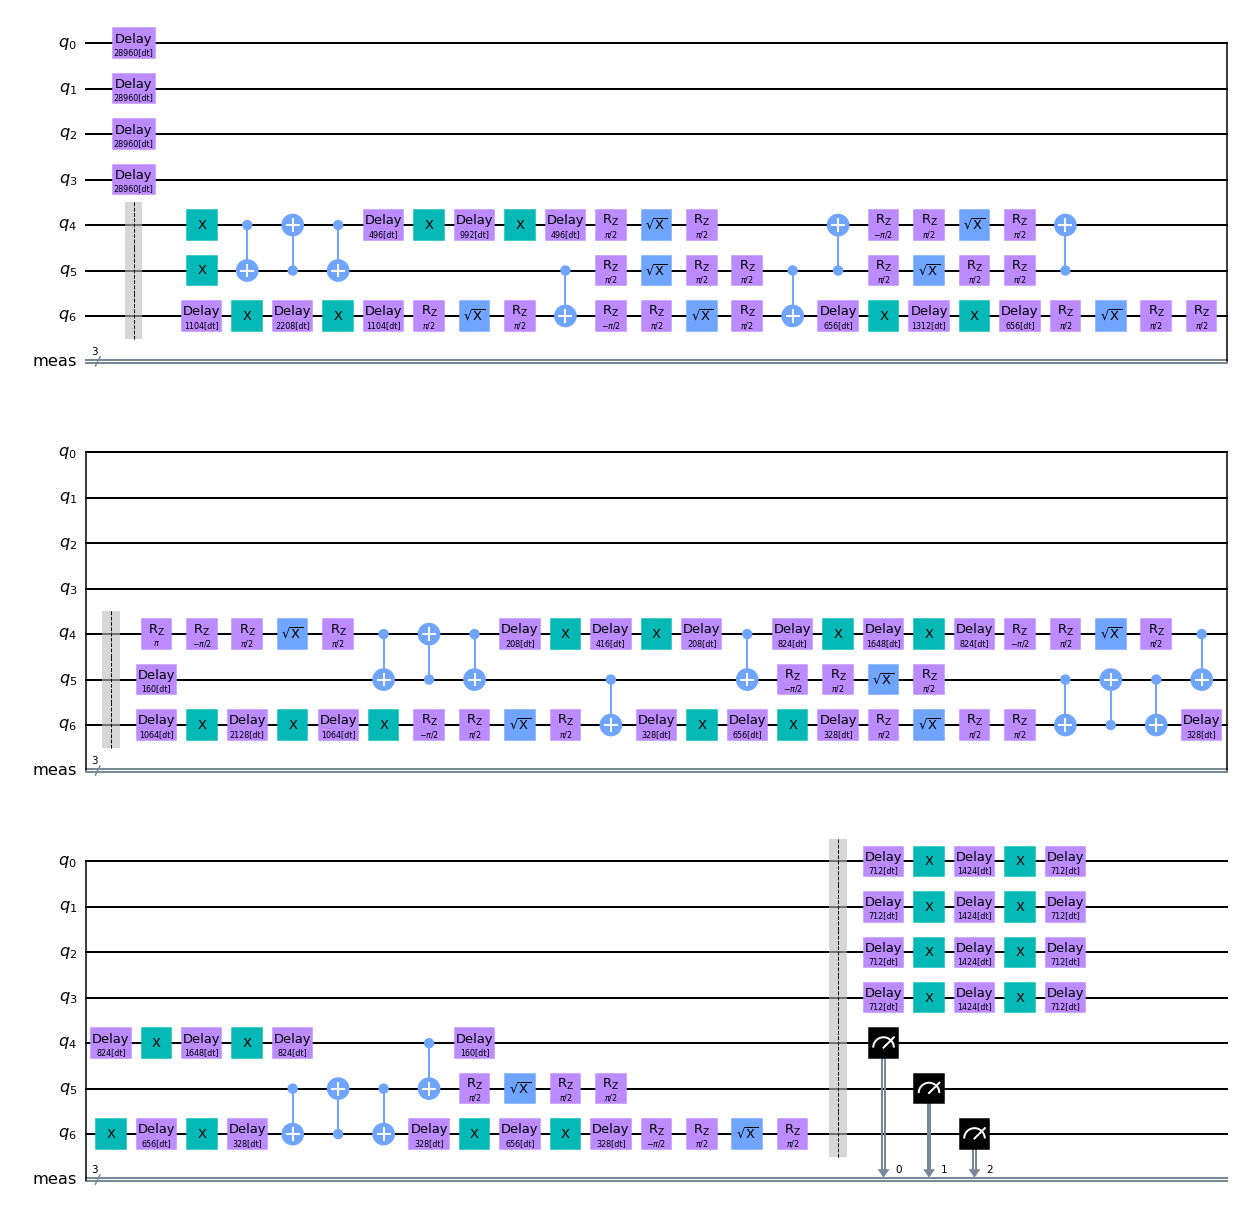

In [27]:
exp1._transpiled_circuits()[0].draw('mpl')